In [11]:
#Impport the neccesary packages

import numpy as np
import pandas as pd
import sqlite3
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
#from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
import itertools
from subprocess import check_output


In [356]:
#Connect to the sqlite database to read the datasets
con = sqlite3.connect("Downloads/database.sqlite")

In [357]:
#Extract the player and the player_attribute tables
player = pd.read_sql_query("SELECT * from Player",con)
player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)


In [358]:
#View part of the data
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [359]:
#Merge the two tables
player = player.merge(player_attributes, how="inner", on='player_api_id', copy=False) \
                .set_index('player_api_id') \
                #.drop(['player_fifa_api_id'], axis=1)


In [360]:
player.to_csv(r"/Users/brightabohsilasedem/Desktop/alisis/player.csv",index = False)

In [43]:
#Drop duplicated player names
player1 = player.drop_duplicates(subset=['player_name'])

In [79]:
#Correlation analyis
corr_df = player1.drop(['id_x','player_name','birthday','date',"player_fifa_api_id_x","player_fifa_api_id_y","id_y"], axis=1).corr()

Text(0.5, 1, 'Heatmap of dataset')

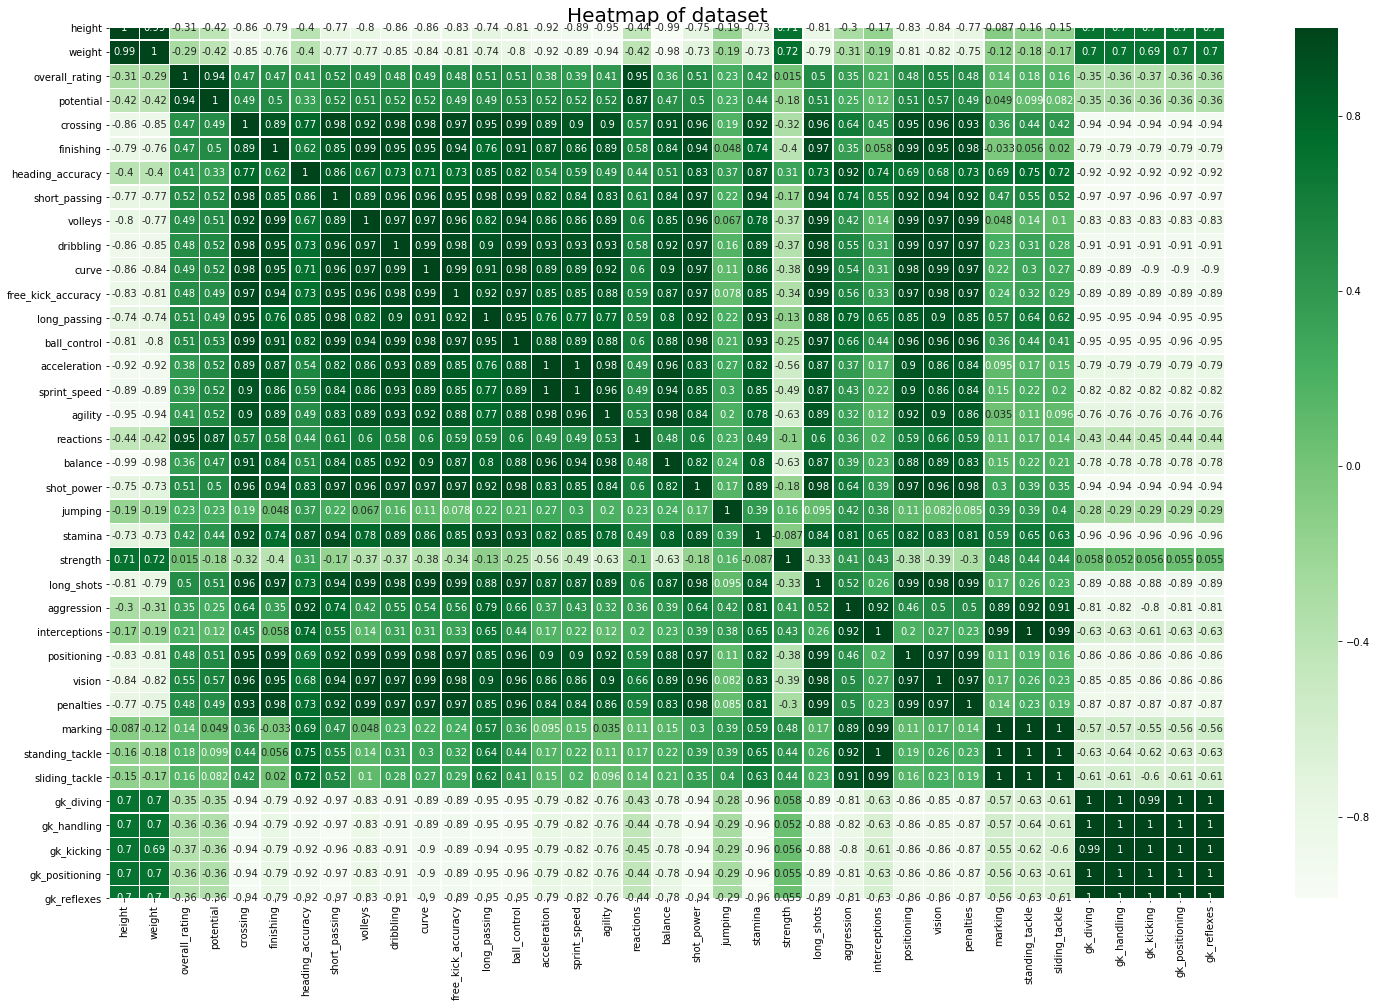

In [81]:
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(corr_df.corr(), annot = True, linewidths=.5, cmap='Greens')
hm.set_title(label='Heatmap of dataset', fontsize=20)

In [89]:
##Strong correlation between overall rating on players with Reactions and Potential of the players

rating = player1['overall_rating']
corr_ovr = player1.drop(['id_x',"player_fifa_api_id_x","player_fifa_api_id_y",'player_name','birthday','date','preferred_foot','attacking_work_rate','defensive_work_rate'], axis=1).corrwith(rating)


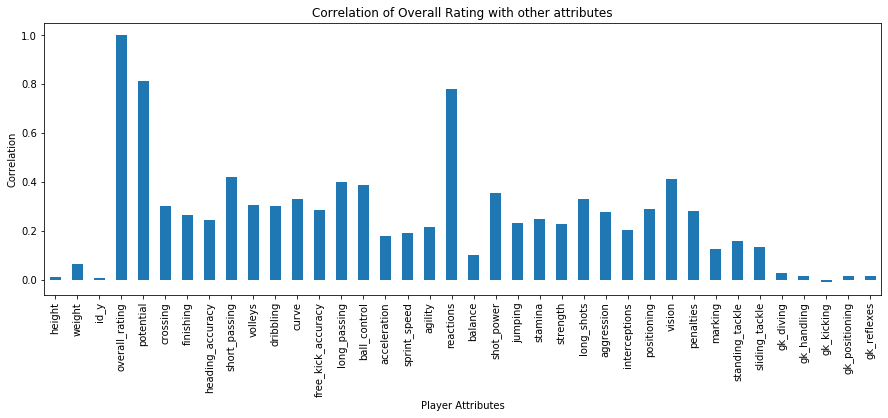

In [90]:
plt.figure(figsize=(15,5))
corr_ovr.plot(kind='bar')
plt.xlabel("Player Attributes")
plt.ylabel('Correlation')
plt.title('Correlation of Overall Rating with other attributes')
plt.show()

In [119]:
#Top 5 highly rated players
Player_rating = player1.sort_values('overall_rating', ascending=False).head(5)
Player_rating[['player_name','overall_rating']]

,player_name,overall_rating
player_api_id,,
30981,Lionel Messi,94.0
30893,Cristiano Ronaldo,93.0
40636,Luis Suarez,90.0
27299,Manuel Neuer,90.0
19533,Neymar,90.0


In [120]:
#player.info()
df = player1[(player1['player_name'] == "Lionel Messi") | (player1['player_name'] == "Cristiano Ronaldo")]

In [352]:
#A function to compare the attributes of the two players, Messi and Ronaldo
idx  = "player_api_id"
cols = ['overall_rating','potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'sprint_speed',
       'agility', 'reactions', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'standing_tackle', 'sliding_tackle']

def player_comparator(playerA,playerB):
    
    x1 = player1[player1["player_name"] == playerA]
    x1 = x1.groupby(["player_name"])[cols].mean()
   
    
    x2 = player1[player1["player_name"] == playerB]
    x2 = x2.groupby(["player_name"])[cols].mean()
    
    
    z  = pd.concat([x1,x2]).transpose().reset_index()
    z  = z.rename(columns={"index":"attributes",playerA:playerA,playerB:playerB})
    z.index = z.attributes
    z[[playerA,playerB]].plot(kind = "barh",
                            figsize = (12,8),
                            colors = ["green","orange"],
                            linewidth = .7 ,
                            #marker='o', 
                            width = .7,
                            edgecolor = ["k"]*z["attributes"].nunique()
                            )
    plt.xlabel("Mean value")
    plt.legend(loc = "best",prop = {"size" : 10})
    plt.grid(True,alpha = .2)
    plt.title(playerA+"  vs  "+playerB)

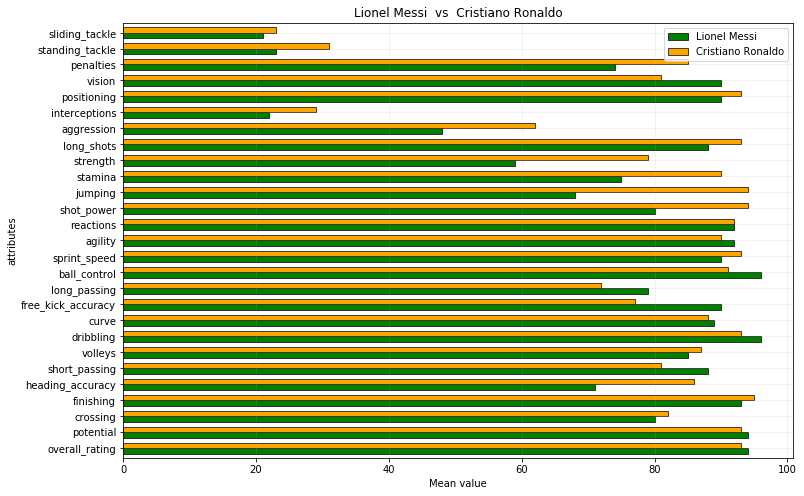

In [353]:
player_comparator('Lionel Messi','Cristiano Ronaldo')

In [ ]:
# Process and calculate the mean value of the skill sets of Ronaldo and messi

In [191]:
DF = df.drop(["gk_diving","gk_handling","gk_kicking","gk_positioning","gk_reflexes","player_fifa_api_id_x","player_fifa_api_id_y","birthday","id_x","weight","height","date","id_y","preferred_foot","attacking_work_rate","defensive_work_rate"],axis = 1)

In [206]:
col = df.loc[: , "overall_rating":"sliding_tackle"]

In [258]:
DF['player_attribbute_mean'] = col.mean(axis=1)
DF['player_attribute_std'] = col.std(axis = 1)


In [262]:
DF.to_csv(r"/Users/brightabohsilasedem/Desktop/alisis/data.csv",index = False)

In [298]:
#Extract the various player attributes of Messi and Ronaldo into different dataframes
data1 = [93,93,82,95,86,81,87,93,88,77,72,91,91,93,90,92,62,94,94,90,79,93,62,29,93,81,85,22,31,23]
data2 = [94,94,80,93,71,88,85,96,89,90,79,96,95,90,92,92,95,80,68,75,59,88,48,22,90,90,74,13,23,21]


In [299]:
len(data2)

30

In [300]:

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = math.sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

In [301]:
df

198

In [302]:

# Student's t-test for independent samples
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator

Cristiano = data1
Messi = data2
# compare samples
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

t=0.391, p=0.697


In [328]:

# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

 
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1 = 78.066667#mean(data1)
	mean2 = 75.666667#mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 

alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=0.391, df=58, cv=1.672, p=0.697
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


In [326]:
from scipy import stats

In [327]:
stats.ttest_ind(data1,data2, equal_var = False)

Ttest_indResult(statistic=0.39064205149576164, pvalue=0.6975101247455259)